<a href="https://colab.research.google.com/github/nalenndra/Autism_ANN/blob/Project/CLUSTERING_TS_RASIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING TS

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("/content/Data.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 44 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   TAHUN                                                        320 non-null    int64  
 1   Negara                                                       320 non-null    object 
 2   TPAK                                                         320 non-null    float64
 3   Unemployment Rate                                            217 non-null    float64
 4   General government final consumption expenditure (% of GDP)  267 non-null    float64
 5   Manufactur (% GDP)                                           277 non-null    float64
 6   Inflation, GDP deflator: linked series (annual %)            64 non-null     float64
 7   Unnamed: 7                                                   0 non-null      flo

In [5]:
data = data[['TAHUN','Negara','TPAK', 'Unemployment Rate','General government final consumption expenditure (% of GDP)', 'Manufactur (% GDP)', 'Inflation, GDP deflator: linked series (annual %)']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   TAHUN                                                        320 non-null    int64  
 1   Negara                                                       320 non-null    object 
 2   TPAK                                                         320 non-null    float64
 3   Unemployment Rate                                            217 non-null    float64
 4   General government final consumption expenditure (% of GDP)  267 non-null    float64
 5   Manufactur (% GDP)                                           277 non-null    float64
 6   Inflation, GDP deflator: linked series (annual %)            64 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 17.6+ KB


In [7]:
# column to date time year
data['TAHUN'] = pd.to_datetime(data['TAHUN'], format='%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   TAHUN                                                        320 non-null    datetime64[ns]
 1   Negara                                                       320 non-null    object        
 2   TPAK                                                         320 non-null    float64       
 3   Unemployment Rate                                            217 non-null    float64       
 4   General government final consumption expenditure (% of GDP)  267 non-null    float64       
 5   Manufactur (% GDP)                                           277 non-null    float64       
 6   Inflation, GDP deflator: linked series (annual %)            64 non-null     float64       
dtypes: datetime64[ns](

<ipython-input-7-ea52a622adf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TAHUN'] = pd.to_datetime(data['TAHUN'], format='%Y')


In [8]:
data

,TAHUN,Negara,TPAK,Unemployment Rate,General government final consumption expenditure (% of GDP),Manufactur (% GDP),"Inflation, GDP deflator: linked series (annual %)"
0,1991-01-01,Indonesia,67.769,2.617,9.138088,20.956438,72.546385
1,1992-01-01,Indonesia,68.040,2.734,9.516266,21.756442,32.629184
2,1993-01-01,Indonesia,67.340,2.782,9.023312,22.304951,17.414975
3,1994-01-01,Indonesia,68.715,4.366,8.114181,23.348038,16.952316
4,1995-01-01,Indonesia,68.695,NaN,7.829064,24.133179,17.040195
...,...,...,...,...,...,...,...
315,2018-01-01,Brunei,68.880,8.700,24.141677,14.066325,NaN
316,2019-01-01,Brunei,67.924,6.600,25.040396,13.602219,NaN
317,2020-01-01,Brunei,67.678,7.409,25.430986,15.769858,NaN
318,2021-01-01,Brunei,68.130,4.905,22.467059,18.514386,NaN


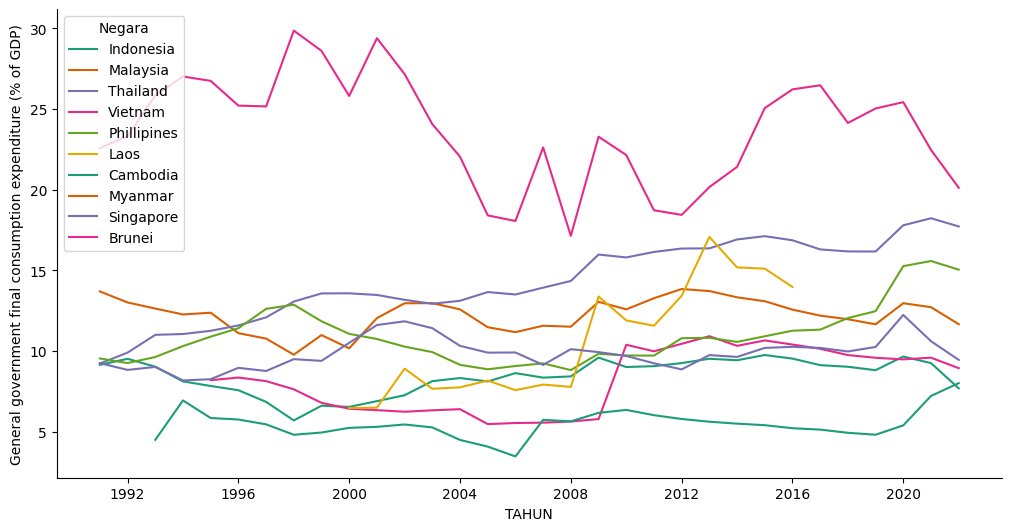

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

# Define a function to plot a series for each country
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['TAHUN']
    ys = series['General government final consumption expenditure (% of GDP)']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Filter the dataframe for each country
countries = data['Negara'].unique()  # Get the list of unique countries

for i, country in enumerate(countries):
    df_country = data[data['Negara'] == country]  # Filter data by country
    df_sorted = df_country.sort_values('TAHUN', ascending=True)  # Sort data by year
    _plot_series(df_sorted, series_name=country, series_index=i)  # Call plot function

# Beautify the plot
sns.despine(fig=fig, ax=ax)
plt.xlabel('TAHUN')
plt.ylabel('General government final consumption expenditure (% of GDP)')
plt.legend(title='Negara')
plt.show()


In [15]:
#subset data start from Tahun 2010
data_2010 = data[data['TAHUN'] >= '2010-01-01']
data_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 19 to 319
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   TAHUN                                                        130 non-null    datetime64[ns]
 1   Negara                                                       130 non-null    object        
 2   TPAK                                                         130 non-null    float64       
 3   Unemployment Rate                                            103 non-null    float64       
 4   General government final consumption expenditure (% of GDP)  111 non-null    float64       
 5   Manufactur (% GDP)                                           130 non-null    float64       
 6   Inflation, GDP deflator: linked series (annual %)            26 non-null     float64       
dtypes: datetime64[ns](1), 

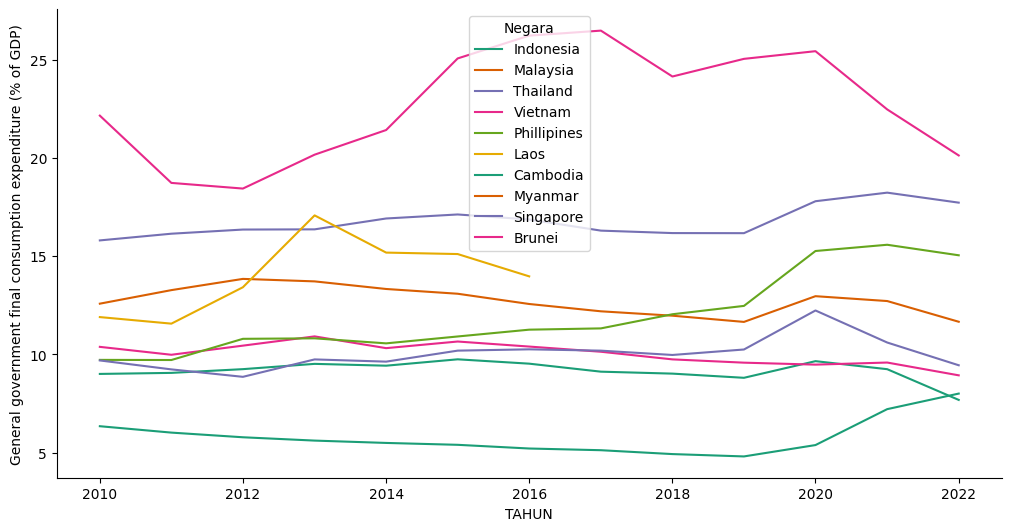

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

# Define a function to plot a series for each country
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['TAHUN']
    ys = series['General government final consumption expenditure (% of GDP)']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Filter the dataframe for each country
countries = data_2010['Negara'].unique()  # Get the list of unique countries

for i, country in enumerate(countries):
    df_country = data_2010[data_2010['Negara'] == country]  # Filter data by country
    df_sorted = df_country.sort_values('TAHUN', ascending=True)  # Sort data by year
    _plot_series(df_sorted, series_name=country, series_index=i)  # Call plot function

# Beautify the plot
sns.despine(fig=fig, ax=ax)
plt.xlabel('TAHUN')
plt.ylabel('General government final consumption expenditure (% of GDP)')
plt.legend(title='Negara')
plt.show()


# Clustering

In [18]:
data_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 19 to 319
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   TAHUN                                                        130 non-null    datetime64[ns]
 1   Negara                                                       130 non-null    object        
 2   TPAK                                                         130 non-null    float64       
 3   Unemployment Rate                                            103 non-null    float64       
 4   General government final consumption expenditure (% of GDP)  111 non-null    float64       
 5   Manufactur (% GDP)                                           130 non-null    float64       
 6   Inflation, GDP deflator: linked series (annual %)            26 non-null     float64       
dtypes: datetime64[ns](1), 

## Feature Extraction

In [20]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [22]:
# Importing the required modules
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

# Ensure the DataFrame has the appropriate columns: 'Date', 'unique_id', 'Sessions'
df = data_2010[['TAHUN', 'Negara', 'Manufactur (% GDP)']]

# Extract features using tsfresh
extracted_features = extract_features(df,
                                      column_id='Negara',  # Unique identifier for each time series
                                      column_sort='TAHUN',     # Column to sort the data (e.g., time)
                                      default_fc_parameters=MinimalFCParameters())

# Display the extracted features
extracted_features.head()

Feature Extraction: 100%|██████████| 10/10 [00:00<00:00, 84.29it/s]


,Manufactur (% GDP)__sum_values,Manufactur (% GDP)__median,Manufactur (% GDP)__mean,Manufactur (% GDP)__length,Manufactur (% GDP)__standard_deviation,Manufactur (% GDP)__variance,Manufactur (% GDP)__root_mean_square,Manufactur (% GDP)__maximum,Manufactur (% GDP)__absolute_maximum,Manufactur (% GDP)__minimum
Brunei,203.313007,15.769858,15.639462,13.0,2.596596,6.742310,15.853551,22.123750,22.123750,11.460618
Cambodia,209.552642,16.013772,16.119434,13.0,1.086763,1.181054,16.156027,18.817838,18.817838,14.693880
Indonesia,266.036173,20.522975,20.464321,13.0,1.019362,1.039099,20.489693,22.038629,22.038629,18.336523
Laos,111.339916,8.427695,8.564609,13.0,1.106660,1.224697,8.635810,11.094410,11.094410,7.452727
Malaysia,293.496904,22.840742,22.576685,13.0,0.728253,0.530352,22.588427,23.433776,23.433776,21.408998


## Kmeans

In [31]:
extracted_features

,Manufactur (% GDP)__sum_values,Manufactur (% GDP)__median,Manufactur (% GDP)__mean,Manufactur (% GDP)__length,Manufactur (% GDP)__standard_deviation,Manufactur (% GDP)__variance,Manufactur (% GDP)__root_mean_square,Manufactur (% GDP)__maximum,Manufactur (% GDP)__absolute_maximum,Manufactur (% GDP)__minimum
Brunei,203.313007,15.769858,15.639462,13.0,2.596596,6.742310,15.853551,22.123750,22.123750,11.460618
Cambodia,209.552642,16.013772,16.119434,13.0,1.086763,1.181054,16.156027,18.817838,18.817838,14.693880
Indonesia,266.036173,20.522975,20.464321,13.0,1.019362,1.039099,20.489693,22.038629,22.038629,18.336523
Laos,111.339916,8.427695,8.564609,13.0,1.106660,1.224697,8.635810,11.094410,11.094410,7.452727
Malaysia,293.496904,22.840742,22.576685,13.0,0.728253,0.530352,22.588427,23.433776,23.433776,21.408998
Myanmar,294.100941,22.795351,22.623149,13.0,2.492101,6.210565,22.759997,25.637453,25.637453,19.721312
Phillipines,255.122555,19.590303,19.624812,13.0,1.498955,2.246868,19.681974,21.919202,21.919202,17.229379
Singapore,248.970336,19.363851,19.151564,13.0,1.077169,1.160292,19.181833,20.773833,20.773833,17.474421
Thailand,356.703318,27.167599,27.438717,13.0,1.324708,1.754851,27.470676,30.930479,30.930479,25.555333
Vietnam,282.373034,21.488253,21.721003,13.0,2.223564,4.944237,21.834518,24.579573,24.579573,17.130571


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

prep = StandardScaler()
kmeans = KMeans(n_clusters=4, random_state=0)

scaled_data = prep.fit_transform(extracted_features)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d2098784670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
   

KMeans(n_clusters=4, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


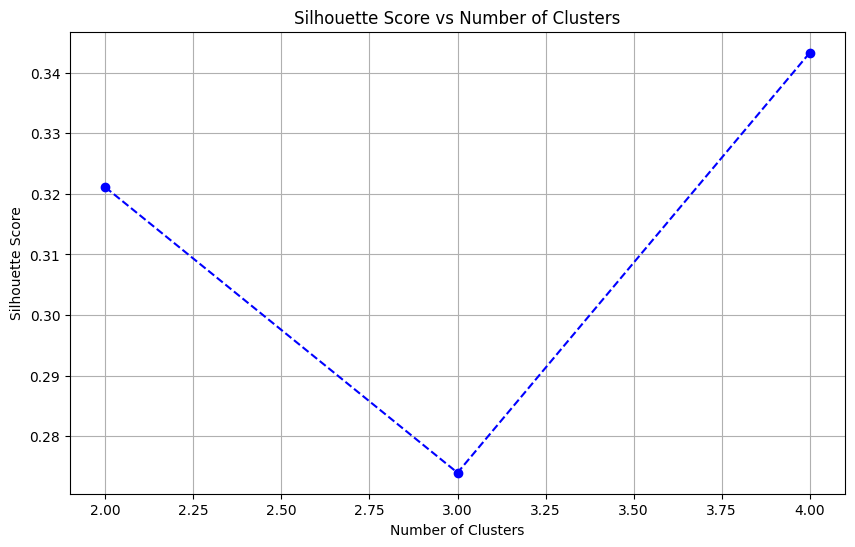

In [28]:
# Define range for the number of clusters
cluster_range = range(2, 5)  # Test cluster numbers from 2 to 10
silhouette_scores = []

# Loop over different numbers of clusters and calculate silhouette scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(sil_score)

# Plotting silhouette score vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


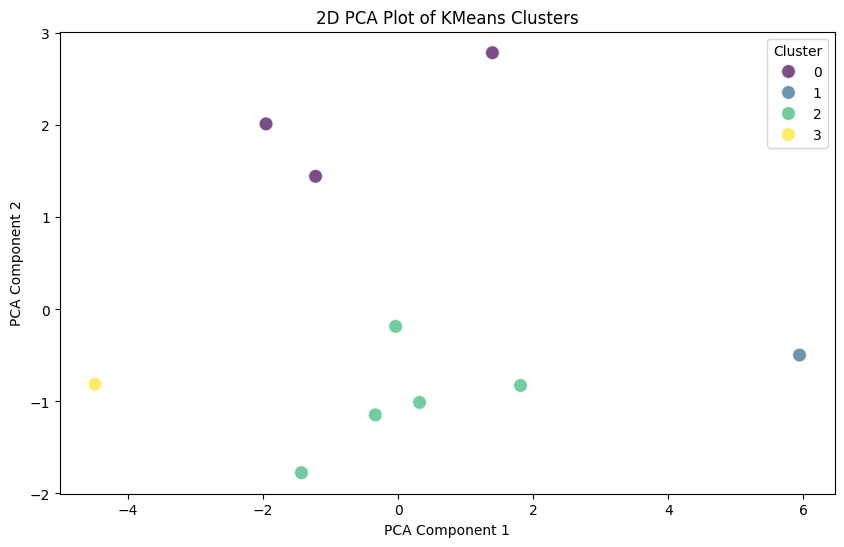

In [29]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the extracted features
prep = StandardScaler()
scaled_data = prep.fit_transform(extracted_features)

# Perform KMeans clustering with a chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7)
plt.title('2D PCA Plot of KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


## Clarans

In [33]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395101 sha256=c71abfea5f437d73a10049aa8362836256a72c22dc1e29101f828675cc69ef18
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the extracted features
prep = StandardScaler()
scaled_data = prep.fit_transform(extracted_features)

# Perform KMeans clustering with a chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7)
plt.title('2D PCA Plot of KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


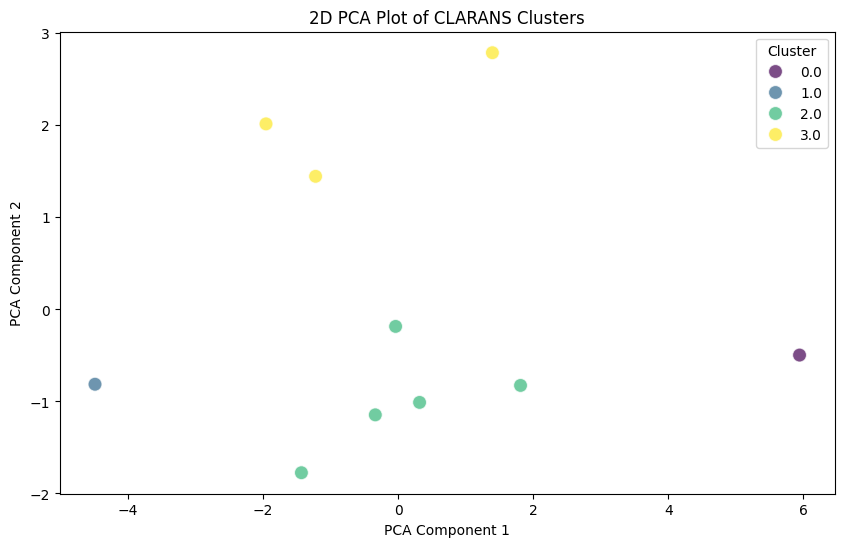

In [39]:
# Import necessary libraries
from pyclustering.cluster.clarans import clarans
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize the extracted features
prep = StandardScaler()
scaled_data = prep.fit_transform(extracted_features)

# Convert scaled_data to list for pyclustering CLARANS
scaled_data_list = scaled_data.tolist()

# Perform CLARANS clustering
clarans_instance = clarans(scaled_data_list, number_clusters=4, numlocal=5, maxneighbor=20)
clarans_instance.process()

# Retrieve clusters and noise
clusters = clarans_instance.get_clusters()

# Create cluster labels (needed for visualization)
cluster_labels = np.zeros(len(scaled_data_list)) - 1  # Initialize all points as noise (-1)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        cluster_labels[index] = cluster_id

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7)
plt.title('2D PCA Plot of CLARANS Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


In [41]:
# Create a DataFrame for the original data and include cluster labels
result_df = pd.DataFrame(scaled_data, columns=extracted_features.columns)
result_df['Cluster'] = cluster_labels

# Display the first few rows of the result DataFrame
print(result_df.head())


   Manufactur (% GDP)__sum_values  Manufactur (% GDP)__median  \
0                       -0.775750                   -0.749397   
1                       -0.676537                   -0.699017   
2                        0.221578                    0.232354   
3                       -2.238165                   -2.265913   
4                        0.658216                    0.711087   

   Manufactur (% GDP)__mean  Manufactur (% GDP)__length  \
0                 -0.775750                         0.0   
1                 -0.676537                         0.0   
2                  0.221578                         0.0   
3                 -2.238165                         0.0   
4                  0.658216                         0.0   

   Manufactur (% GDP)__standard_deviation  Manufactur (% GDP)__variance  \
0                                1.694828                      1.822352   
1                               -0.671938                     -0.686901   
2                            

In [42]:
result_df

,Manufactur (% GDP)__sum_values,Manufactur (% GDP)__median,Manufactur (% GDP)__mean,Manufactur (% GDP)__length,Manufactur (% GDP)__standard_deviation,Manufactur (% GDP)__variance,Manufactur (% GDP)__root_mean_square,Manufactur (% GDP)__maximum,Manufactur (% GDP)__absolute_maximum,Manufactur (% GDP)__minimum,Cluster
0,-0.775750,-0.749397,-0.775750,0.0,1.694828,1.822352,-0.748615,-0.002313,-0.002313,-1.166611,3.0
1,-0.676537,-0.699017,-0.676537,0.0,-0.671938,-0.686901,-0.685919,-0.688522,-0.688522,-0.491330,2.0
2,0.221578,0.232354,0.221578,0.0,-0.777594,-0.750951,0.212341,-0.019982,-0.019982,0.269453,2.0
3,-2.238165,-2.265913,-2.238165,0.0,-0.640748,-0.667209,-2.244673,-2.291675,-2.291675,-2.003677,0.0
4,0.658216,0.711087,0.658216,0.0,-1.233927,-0.980499,0.647357,0.269609,0.269609,0.911154,2.0
5,0.667820,0.701711,0.667820,0.0,1.531024,1.582427,0.682919,0.727027,0.727027,0.558673,3.0
6,0.048046,0.039712,0.048046,0.0,-0.025798,-0.206003,0.044921,-0.044771,-0.044771,0.038221,2.0
7,-0.049777,-0.007062,-0.049777,0.0,-0.686978,-0.696269,-0.058745,-0.282516,-0.282516,0.089399,2.0
8,1.663227,1.604795,1.663227,0.0,-0.298944,-0.428003,1.659325,1.825701,1.825701,1.777134,1.0
9,0.481341,0.431731,0.481341,0.0,1.110075,1.011057,0.491090,0.507442,0.507442,0.017584,3.0


In [43]:
extracted_features_cluster = extracted_features.copy()
extracted_features_cluster['Cluster'] = cluster_labels
extracted_features_cluster

,Manufactur (% GDP)__sum_values,Manufactur (% GDP)__median,Manufactur (% GDP)__mean,Manufactur (% GDP)__length,Manufactur (% GDP)__standard_deviation,Manufactur (% GDP)__variance,Manufactur (% GDP)__root_mean_square,Manufactur (% GDP)__maximum,Manufactur (% GDP)__absolute_maximum,Manufactur (% GDP)__minimum,Cluster
Brunei,203.313007,15.769858,15.639462,13.0,2.596596,6.742310,15.853551,22.123750,22.123750,11.460618,3.0
Cambodia,209.552642,16.013772,16.119434,13.0,1.086763,1.181054,16.156027,18.817838,18.817838,14.693880,2.0
Indonesia,266.036173,20.522975,20.464321,13.0,1.019362,1.039099,20.489693,22.038629,22.038629,18.336523,2.0
Laos,111.339916,8.427695,8.564609,13.0,1.106660,1.224697,8.635810,11.094410,11.094410,7.452727,0.0
Malaysia,293.496904,22.840742,22.576685,13.0,0.728253,0.530352,22.588427,23.433776,23.433776,21.408998,2.0
Myanmar,294.100941,22.795351,22.623149,13.0,2.492101,6.210565,22.759997,25.637453,25.637453,19.721312,3.0
Phillipines,255.122555,19.590303,19.624812,13.0,1.498955,2.246868,19.681974,21.919202,21.919202,17.229379,2.0
Singapore,248.970336,19.363851,19.151564,13.0,1.077169,1.160292,19.181833,20.773833,20.773833,17.474421,2.0
Thailand,356.703318,27.167599,27.438717,13.0,1.324708,1.754851,27.470676,30.930479,30.930479,25.555333,1.0
Vietnam,282.373034,21.488253,21.721003,13.0,2.223564,4.944237,21.834518,24.579573,24.579573,17.130571,3.0


In [44]:
extracted_features_cluster['Cluster'].value_counts()

,count
Cluster,
2.0,5
3.0,3
0.0,1
1.0,1


In [45]:
cluster_means = extracted_features_cluster.groupby('Cluster').mean()
print(cluster_means)


         Manufactur (% GDP)__sum_values  Manufactur (% GDP)__median  \
Cluster                                                               
0.0                          111.339916                    8.427695   
1.0                          356.703318                   27.167599   
2.0                          254.635722                   19.666329   
3.0                          259.928994                   20.017821   

         Manufactur (% GDP)__mean  Manufactur (% GDP)__length  \
Cluster                                                         
0.0                      8.564609                        13.0   
1.0                     27.438717                        13.0   
2.0                     19.587363                        13.0   
3.0                     19.994538                        13.0   

         Manufactur (% GDP)__standard_deviation  Manufactur (% GDP)__variance  \
Cluster                                                                         
0.0                 

In [46]:
cluster_means

,Manufactur (% GDP)__sum_values,Manufactur (% GDP)__median,Manufactur (% GDP)__mean,Manufactur (% GDP)__length,Manufactur (% GDP)__standard_deviation,Manufactur (% GDP)__variance,Manufactur (% GDP)__root_mean_square,Manufactur (% GDP)__maximum,Manufactur (% GDP)__absolute_maximum,Manufactur (% GDP)__minimum
Cluster,,,,,,,,,,
0.0,111.339916,8.427695,8.564609,13.0,1.106660,1.224697,8.635810,11.094410,11.094410,7.452727
1.0,356.703318,27.167599,27.438717,13.0,1.324708,1.754851,27.470676,30.930479,30.930479,25.555333
2.0,254.635722,19.666329,19.587363,13.0,1.082100,1.231533,19.619591,21.396655,21.396655,17.828640
3.0,259.928994,20.017821,19.994538,13.0,2.437420,5.965704,20.149355,24.113592,24.113592,16.104167
